In [ ]:
conda install geopandas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import warnings; warnings.simplefilter('ignore')
from code_files_feature_extraction import *

%matplotlib inline 

In [3]:
arp_df = pd.read_csv('US_Accidents_June20.csv')

In [4]:
arp_df.head(3)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day


In [5]:
# Get the number of rows and columns
arp_df.shape

(3513617, 49)

In [6]:
# Get the datatype of each of the columns
arp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

<h3>Data Pre-processing and feature addition</h3>

In [7]:
mod1_arp_df = get_time_features(arp_df) #5 columns added: accDuration, day, month, year, dayOfWeek
mod2_arp_df = convert_boolean_features(mod1_arp_df) #13 columns converted
mod3_arp_df = rename_bracketed_columns(mod2_arp_df) #8 columns renamed

time features ...
accDuration added to the df...
day,month,year,dayOfWeek added to the df.
boolean conversion features ...


In [9]:
# get the number or rows and columns
mod3_arp_df.shape

(3513617, 54)

In [34]:
# Check for missing values
mod3_arp_df.isnull().sum()

ID                             0
Source                         0
TMC                      1034799
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  2478818
End_Lng                  2478818
Distance_mi                    0
Description                    1
Number                   2262864
Street                         0
Side                           0
City                         112
County                         0
State                          0
Zipcode                     1069
Country                        0
Timezone                    3880
Airport_Code                6758
Weather_Timestamp          43323
Temperature_F              65732
Wind_Chill_F             1868249
Humidity_%                 69687
Pressure_in                55882
Visibility_mi              75856
Wind_Direction             58874
Wind_Speed_mph            454609
Precipitat

In [38]:
mod4_arp_df =mod3_arp_df.drop(['TMC','End_Lat','End_Lng','Visibility_mi','Weather_Timestamp','Pressure_in','Zipcode','Humidity_%','Temperature_F','Number','Weather_Condition','Wind_Speed_mph','Wind_Direction','Airport_Code','Wind_Chill_F','Precipitation_in','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight'], axis=1)

In [39]:
mod4_arp_df.shape

(3513617, 35)

In [40]:
mod4_arp_df.isnull().sum()

ID                    0
Source                0
Severity              0
Start_Time            0
End_Time              0
Start_Lat             0
Start_Lng             0
Distance_mi           0
Description           1
Street                0
Side                  0
City                112
County                0
State                 0
Country               0
Timezone           3880
Amenity               0
Bump                  0
Crossing              0
Give_Way              0
Junction              0
No_Exit               0
Railway               0
Roundabout            0
Station               0
Stop                  0
Traffic_Calming       0
Traffic_Signal        0
Turning_Loop          0
Sunrise_Sunset      115
accDuration           0
day                   0
month                 0
year                  0
dayOfWeek             0
dtype: int64

In [41]:
mod4_arp_df['Description'].fillna(str(mod4_arp_df['Description'].mode().values[0]), inplace=True)
mod4_arp_df['City'].fillna(str(mod4_arp_df['City'].mode().values[0]), inplace=True)
mod4_arp_df['Timezone'].fillna(str(mod4_arp_df['Timezone'].mode().values[0]), inplace=True)
mod4_arp_df['Sunrise_Sunset'].fillna(str(mod4_arp_df['Sunrise_Sunset'].mode().values[0]), inplace=True)

In [46]:
mod4_arp_df.isnull().sum()

ID                 0
Source             0
Severity           0
Start_Time         0
End_Time           0
Start_Lat          0
Start_Lng          0
Distance_mi        0
Description        0
Street             0
Side               0
City               0
County             0
State              0
Country            0
Timezone           0
Amenity            0
Bump               0
Crossing           0
Give_Way           0
Junction           0
No_Exit            0
Railway            0
Roundabout         0
Station            0
Stop               0
Traffic_Calming    0
Traffic_Signal     0
Turning_Loop       0
Sunrise_Sunset     0
accDuration        0
day                0
month              0
year               0
dayOfWeek          0
dtype: int64

### Now we have a clean dataset

In [47]:
mod4_arp_df.describe().astype(int)

,Severity,Start_Lat,Start_Lng,Distance_mi,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,accDuration,day,month,year,dayOfWeek
count,3513617,3513617,3513617,3513617,3513617,3513617,3513617,3513617,3513617,3513617,...,3513617,3513617,3513617,3513617,3513617,3513617,3513617,3513617,3513617,3513617
mean,2,36,-95,0,0,0,0,0,0,0,...,0,0,0,0,0,88,15,6,2018,2
std,0,4,17,1,0,0,0,0,0,0,...,0,0,0,0,0,108,8,3,1,1
min,1,24,-124,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,2016,0
25%,2,33,-117,0,0,0,0,0,0,0,...,0,0,0,0,0,29,8,3,2017,1
50%,2,35,-91,0,0,0,0,0,0,0,...,0,0,0,0,0,44,16,6,2018,2
75%,3,40,-80,0,0,0,0,0,0,0,...,0,0,0,0,0,74,23,10,2019,4
max,4,49,-67,333,1,1,1,1,1,1,...,1,1,1,1,0,1439,31,12,2020,6


### Observation from the statistical information we obtained

1. The difference between the mean and the 50th percentile (median)of each columns is relatively small, which is an indication that our dataset is evenly distributed. Except for the column accDuration which had a mean value much greater than the 50th percentile, which indicates that the column has a large number of values at the lower end and few numbers at the high end. However, because the mean finds the average of all the values, both high and low, the few outlying data points on the high end cause the mean to increase, making it higher than the median
 
2. The difference between the 75th percentile and the max of the coluns 'Distance_mi'and 'accDuration', this indicates that some values of these variables lie much farther from the general range of values



# Visualizing

In [14]:
# Find the state with the highest number of accidents

Accidents_per_State = mod4_arp_df.groupby('State')['ID'].count().reset_index()
Accidents_per_State.head(3)

,State,ID
0,AL,44625
1,AR,2012
2,AZ,78584


In [15]:
Accidents_per_State = Accidents_per_State.sort_values(by = "ID",ascending=False)
Accidents_per_State.head(4)

,State,ID
3,CA,816825
41,TX,329284
8,FL,258002
38,SC,173277


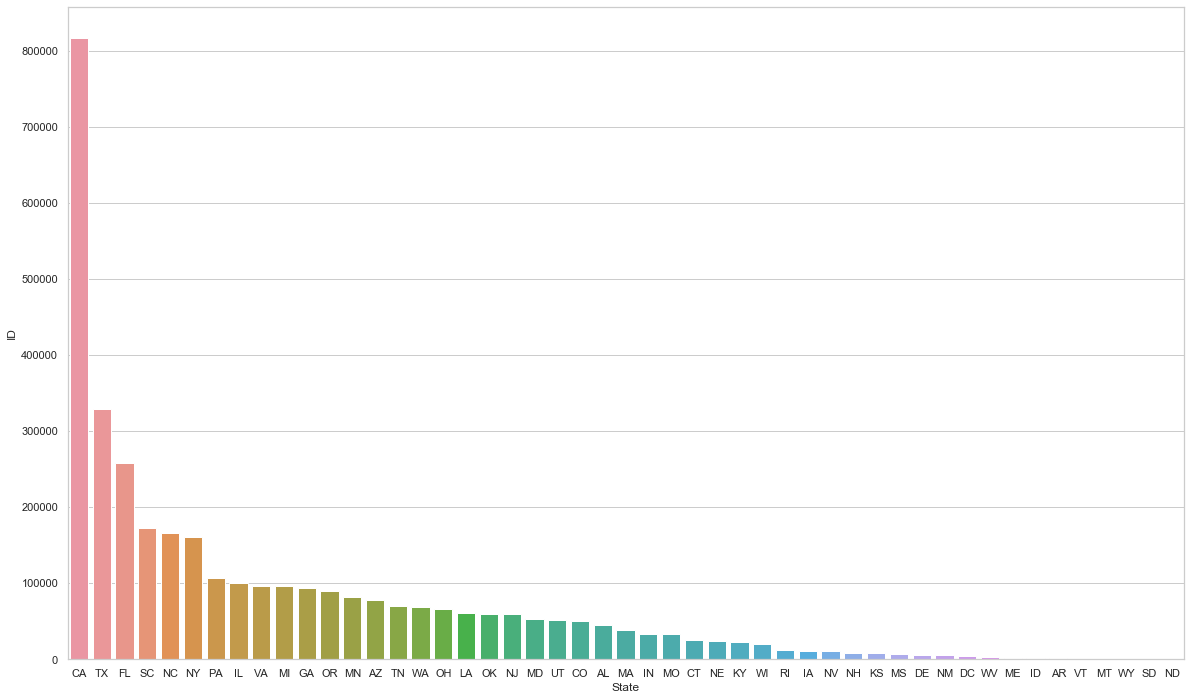

In [16]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(20, 12))
ax = sns.barplot(y="ID", x="State", data=Accidents_per_State)

### Conclusion
California is the state with the highest number of accidents, while North Dakota has the least number of accidents


In [17]:
# Most common severity type
Severity_Type = mod4_arp_df.groupby('Severity')['ID'].count().reset_index()
Severity_Type

,Severity,ID
0,1,29174
1,2,2373210
2,3,998913
3,4,112320


In [18]:
Severity_Type = Severity_Type.sort_values(by = "ID",ascending=False)
Severity_Type

,Severity,ID
1,2,2373210
2,3,998913
3,4,112320
0,1,29174


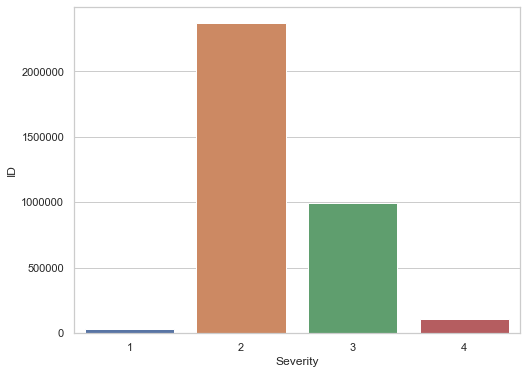

In [19]:
# Use barplot to show the Severity type

f, ax = plt.subplots(figsize=(8, 6))
ax = sns.barplot(y="ID", x="Severity", data=Severity_Type)


In [48]:
# When are accidents happening most, Night or Day?

night_or_day = mod4_arp_df.groupby('Sunrise_Sunset')['ID'].count().reset_index()
night_or_day

,Sunrise_Sunset,ID
0,Day,2593872
1,Night,919745


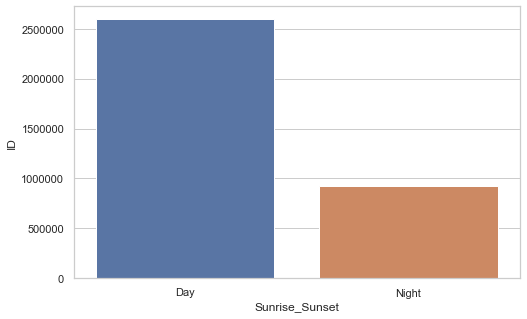

In [49]:
t, ax = plt.subplots(figsize=(8, 5))
ax = sns.barplot(y="ID", x="Sunrise_Sunset", data=night_or_day)


### Conclusion
More accidents occur during day time than at night

In [22]:
weekday_or_weekend = mod4_arp_df.groupby('dayOfWeek')['ID'].count().reset_index()
weekday_or_weekend

,dayOfWeek,ID
0,0,592871
1,1,631136
2,2,624429
3,3,621677
4,4,639706
5,5,214483
6,6,189315


In [23]:
Weekdays = weekday_or_weekend.ID[0:5].sum()
Weekends = weekday_or_weekend.ID[5:].sum()

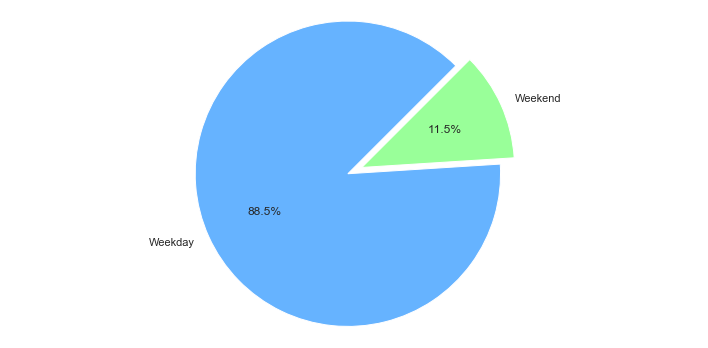

In [24]:
# Pie chart
labels = ['Weekday', 'Weekend']
Days = [Weekdays, Weekends]
color= ['#66b3ff','#99ff99']

plt.figure(figsize =(10,5))

# only "explode" the 2nd slice 
explode = (0, 0.1)  
plt.pie(Days, explode=explode, labels=labels, autopct='%1.1f%%',colors=color, shadow=False, startangle =45)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal') 
plt.tight_layout()
plt.show()

### Conclusion
88.5% of the total accidents recorded, occured during weekdays

In [25]:
# Accident per hour

mod4_arp_df['hour'] = pd.DatetimeIndex(mod4_arp_df['Start_Time']).hour

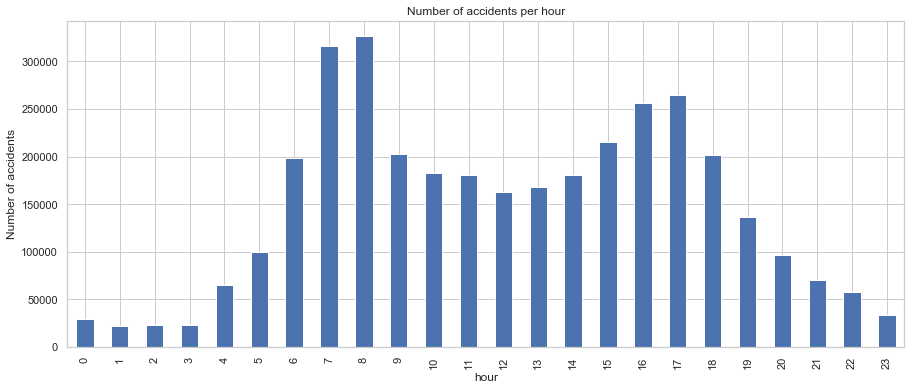

In [30]:
plt.figure(figsize =(15,6))
mod4_arp_df.groupby(['hour']).size().plot.bar()
plt.title('Number of accidents per hour')
plt.ylabel('Number of accidents')
plt.show()

### Conclusion
There are two peaks in the barplot above. The first peak is between the hour of 7am and 8am, which is usually the first rush hour of the day and the second is between 4pm and 5pm which is the second rush hour of the day.

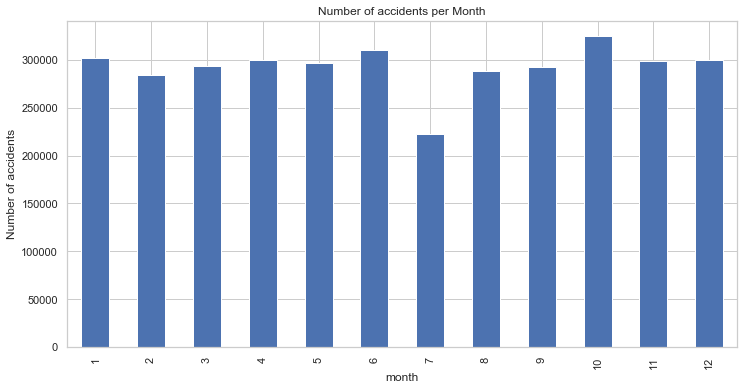

In [31]:
plt.figure(figsize =(12,6))
mod4_arp_df.groupby(['month']).size().plot.bar()
plt.title('Number of accidents per Month')
plt.ylabel('Number of accidents')
plt.show()

### Conclusion
There are less accidents in July(7th month) than any other month.

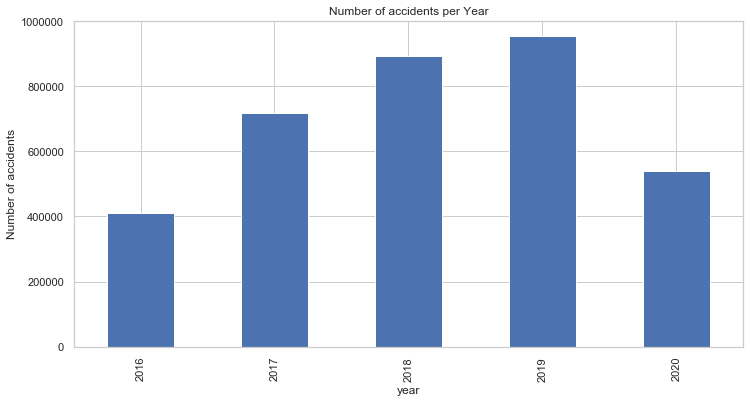

In [32]:
plt.figure(figsize =(12,6))
mod4_arp_df.groupby(['year']).size().plot.bar()
plt.title('Number of accidents per Year')
plt.ylabel('Number of accidents')
plt.show()

### Conclusion
The number of accidents has been increasing on a yearly basis. These can not be confirm for year 2020 because the data available only included the first six months of 2020